**1. Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


**2.Load Dataset**

In [2]:
df = pd.read_csv('/content/UNSW_NB15_training-set.csv')  # update the path
print(df.shape)
df.head()


(82332, 45)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


**3. Remove unnecessary columns like id or textual non-feature fields.**

In [3]:
df.drop(['id'], axis=1, inplace=True)

# Check for nulls
print(df.isnull().sum())


dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat           0
label      

**4. Encode Categorical Columns**

In [10]:
cat_cols = df.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])



**5.Define Features and Labels**

In [5]:
X = df.drop('label', axis=1)
y = df['label']  # 0 = Normal, 1 = Attack


**6. Train-Test Split + Scaling**

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


**7. Train the Model**

In [7]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

**8. Evaluate the Model**

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7418
           1       1.00      1.00      1.00      9049

    accuracy                           1.00     16467
   macro avg       1.00      1.00      1.00     16467
weighted avg       1.00      1.00      1.00     16467



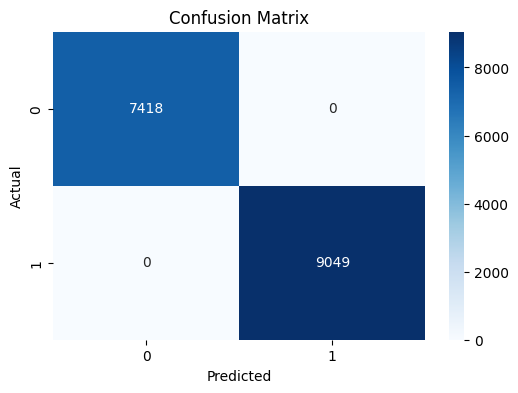

In [8]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


**Feature Importance Visualization**

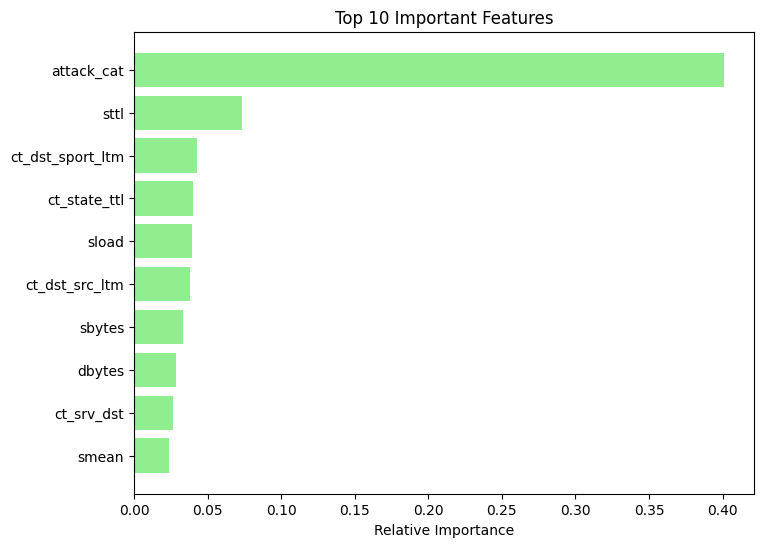

In [9]:
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(8,6))
plt.title('Top 10 Important Features')
plt.barh(range(len(indices)), importances[indices], color='lightgreen', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


**Summary**

Detects whether a given network flow is normal or malicious

Is trained on real-world cyber attack data

Uses feature engineering, preprocessing, and model evaluation best practices

Gives interpretable results via feature importance